In [5]:
import sys
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
from pymodulon.enrichment import *

In [108]:
from matplotlib_venn import venn2, venn3
from venn import venn

In [115]:
import matplotlib
import matplotlib.font_manager
# plt.style.use('figures')
matplotlib.rcParams['pdf.fonttype'] = 42

In [410]:
data_dir = path.join('..','data','processed_data')
ica_data = load_json_model(path.join(data_dir,'ica_wip.json.gz'))

In [10]:
ica_data.sample_table[['ReleaseDate','LoadDate']]

ReleaseDate             LoadDate
SRX259777   2015-07-22 17:03:15  2015-11-15 04:56:56
SRX259778   2015-07-22 17:03:15  2015-11-15 04:49:25
SRX259779   2015-07-22 17:03:15  2015-11-15 04:47:35
SRX259783   2015-07-22 17:03:15  2015-11-15 04:36:53
SRX259784   2015-07-22 17:03:15  2015-11-15 04:30:37
...                         ...                  ...
SRX4105561  2019-05-20 16:28:43  2018-05-21 10:46:22
SRX4105564  2019-05-20 16:28:43  2018-05-21 10:45:52
SRX4105565  2019-05-20 16:28:43  2018-05-21 10:46:25
SRX4105566  2019-05-20 16:28:43  2018-05-21 10:46:19
SRX4105568  2019-05-20 16:28:43  2018-05-21 10:47:21

[300 rows x 2 columns]

## Figure 1 QC

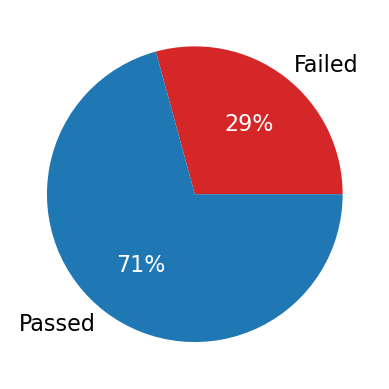

In [23]:
_,_,pcts = plt.pie([124,300],labels = ['Failed','Passed'],colors=['tab:red','tab:blue'],autopct='%.0f%%',
                   textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
plt.savefig('../data/Figures/F1b.pdf',transparent=True)

## Figure 1 explained variance

In [102]:
ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True)[-15:][['type','category']]

type         category
CysR                   Functional       Metabolism
unchar_2          Uncharacterized  Uncharacterized
NtcA-1                 Regulatory       Metabolism
Biofilm-2                 Genomic        Lifestyle
UV                     Functional           Stress
NtcA-2                 Regulatory       Metabolism
Cytc_oxidases          Functional           Energy
unchar_11         Uncharacterized  Uncharacterized
ccm-2                  Regulatory        Transport
HSR                    Functional           Stress
Photosystems           Functional           Energy
state_transition  Uncharacterized  Uncharacterized
competence        Uncharacterized  Uncharacterized
RpaA                   Regulatory    Transcription
unchar_3          Uncharacterized  Uncharacterized

Text(0, 0.5, 'iModulons')

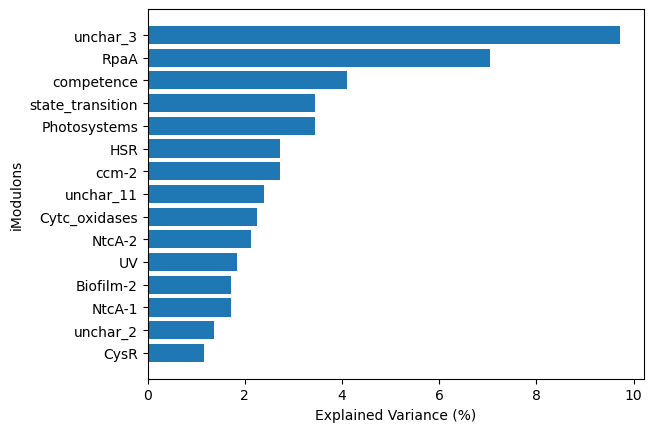

In [105]:
plt.barh(y = [str(x) for x in ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).index[-15:]],
        width=ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).explained_variance[-15:]*100)
plt.xlabel('Explained Variance (%)')
plt.ylabel('iModulons')
# plt.savefig('../data/Figures/F1d.pdf',transparent=True)

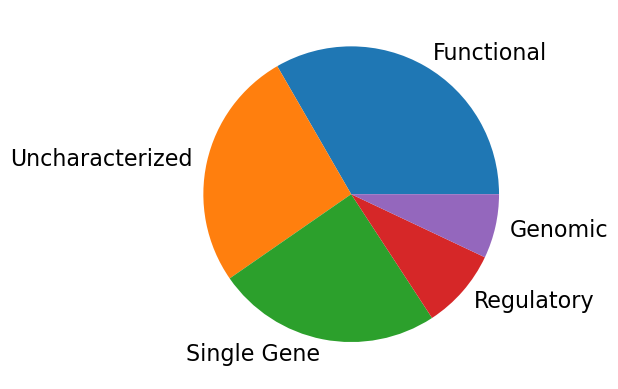

In [70]:
_,pcts = plt.pie(list(ica_data.imodulon_table.type.value_counts().values),
                   labels = ['Functional','Uncharacterized','Single Gene','Regulatory','Genomic'],
                   textprops={'size':16});  
plt.savefig('../data/Figures/F1_pie.pdf',transparent=True)

## Figure 1 treemap

In [4]:
import plotly.express as px
fig = px.treemap(ica_data.imodulon_table.reset_index(),
                path = ['category','index'],
                values='explained_variance')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()
# fig.write_image('../data/Figures/F1f.pdf')

In [106]:
rpaa_regulon = ["Synpcc7942_0004", "Synpcc7942_0012", "Synpcc7942_0013", "Synpcc7942_0017", "Synpcc7942_0018", "Synpcc7942_0065", "Synpcc7942_0095", "Synpcc7942_0100", "Synpcc7942_0101", "Synpcc7942_0102", "Synpcc7942_0156", "Synpcc7942_0157", "Synpcc7942_0170", "Synpcc7942_0171", "Synpcc7942_0172", "Synpcc7942_0243", "Synpcc7942_0244", "Synpcc7942_0245", "Synpcc7942_0314", "Synpcc7942_0315", "Synpcc7942_0316", "Synpcc7942_0342", "Synpcc7942_0369", "Synpcc7942_0370", "Synpcc7942_0371", "Synpcc7942_0394", "Synpcc7942_0433", "Synpcc7942_0434", "Synpcc7942_0457", "Synpcc7942_0462", "Synpcc7942_0463", "Synpcc7942_0464", "Synpcc7942_0465", "Synpcc7942_0466", "Synpcc7942_0467", "Synpcc7942_0468", "Synpcc7942_0469", "Synpcc7942_0482", "Synpcc7942_0483", "Synpcc7942_0556", "Synpcc7942_0557", "Synpcc7942_0558", "Synpcc7942_0570", "Synpcc7942_0571", "Synpcc7942_0572", "Synpcc7942_0657", "Synpcc7942_0797", "Synpcc7942_0834", "Synpcc7942_0846", "Synpcc7942_0847", "Synpcc7942_0891", "Synpcc7942_0905", "Synpcc7942_0906", "Synpcc7942_1150", "Synpcc7942_1156", "Synpcc7942_1157", "Synpcc7942_1164", "Synpcc7942_1216", "Synpcc7942_1217", "Synpcc7942_1313", "Synpcc7942_1327", "Synpcc7942_1328", "Synpcc7942_1336", "Synpcc7942_1337", "Synpcc7942_1393", "Synpcc7942_1475", "Synpcc7942_1505", "Synpcc7942_1506", "Synpcc7942_1548", "Synpcc7942_1552", "Synpcc7942_1553", "Synpcc7942_1557", "Synpcc7942_1572", "Synpcc7942_1573", "Synpcc7942_1574", "Synpcc7942_1575", "Synpcc7942_1586", "Synpcc7942_1610", "Synpcc7942_1611", "Synpcc7942_1612", "Synpcc7942_1621", "Synpcc7942_1622", "Synpcc7942_1646", "Synpcc7942_1647", "Synpcc7942_1656", "Synpcc7942_1661", "Synpcc7942_1740", "Synpcc7942_1741", "Synpcc7942_1742", "Synpcc7942_1745", "Synpcc7942_1746", "Synpcc7942_1753", "Synpcc7942_1754", "Synpcc7942_1755", "Synpcc7942_1756", "Synpcc7942_1757", "Synpcc7942_1784", "Synpcc7942_1802", "Synpcc7942_1803", "Synpcc7942_1804", "Synpcc7942_1833", "Synpcc7942_1834", "Synpcc7942_1835", "Synpcc7942_1849", "Synpcc7942_1914", "Synpcc7942_1949", "Synpcc7942_1950", "Synpcc7942_1951", "Synpcc7942_1960", "Synpcc7942_1974", "Synpcc7942_1975", "Synpcc7942_1976", "Synpcc7942_1987", "Synpcc7942_1999", "Synpcc7942_2058", "Synpcc7942_2059", "Synpcc7942_2113", "Synpcc7942_2114", "Synpcc7942_2116", "Synpcc7942_2117", "Synpcc7942_2118", "Synpcc7942_2119", "Synpcc7942_2120", "Synpcc7942_2121", "Synpcc7942_2185", "Synpcc7942_2248", "Synpcc7942_2254", "Synpcc7942_2266", "Synpcc7942_2267", "Synpcc7942_2279", "Synpcc7942_2306", "Synpcc7942_2307", "Synpcc7942_2308", "Synpcc7942_2326", "Synpcc7942_2333", "Synpcc7942_2334", "Synpcc7942_2335", "Synpcc7942_2336", "Synpcc7942_2378", "Synpcc7942_2379", "Synpcc7942_2387", "Synpcc7942_2388", "Synpcc7942_2394", "Synpcc7942_2395", "Synpcc7942_2460", "Synpcc7942_2473", "Synpcc7942_2474", "Synpcc7942_2475", "Synpcc7942_2487", "Synpcc7942_2488", "Synpcc7942_2522", "Synpcc7942_2523", "Synpcc7942_2524", "Synpcc7942_2525", "Synpcc7942_2526", "Synpcc7942_2527", "Synpcc7942_2552", "Synpcc7942_2553", "Synpcc7942_2554", "Synpcc7942_2555", "Synpcc7942_2556", "Synpcc7942_2557", "Synpcc7942_2590", "Synpcc7942_2591", "Synpcc7942_2596", "Synpcc7942_2597", "Synpcc7942_2605", "Synpcc7942_R0032", "Synpcc7942_R0002", "Synpcc7942_R0024"]

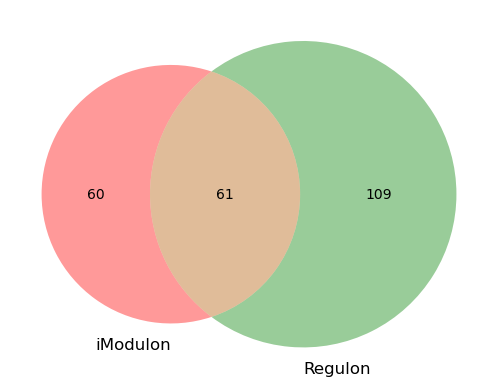

In [145]:
venn2([set(ica_data.view_imodulon('RpaA').index),set(rpaa_regulon)],
     set_labels=('iModulon','Regulon'))
plt.savefig('../data/Figures/rpaa.pdf',transparent=True)

In [146]:
ccmr = set(ica_data.trn[ica_data.trn.regulator=='ccmR'].gene_id)
ccmr2 = set(ica_data.view_imodulon('ccm-2').index)

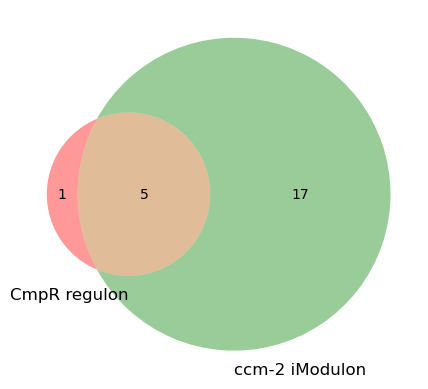

In [147]:
venn2([ccmr,ccmr2],set_labels=('CmpR regulon','ccm-2 iModulon'))
plt.savefig('../data/Figures/cmpr.pdf',transparent=True)

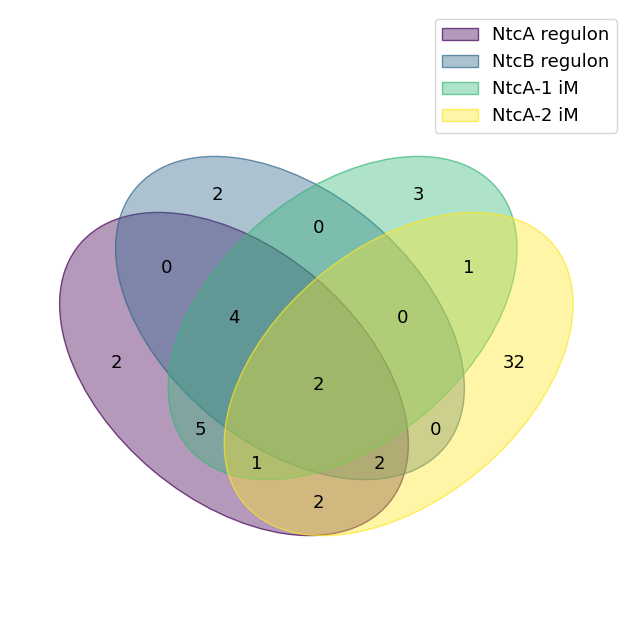

In [113]:
venn({'NtcA regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id),
      'NtcB regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcB'].gene_id),
      'NtcA-1 iM':set(ica_data.view_imodulon('NtcA-1').index),
      'NtcA-2 iM':set(ica_data.view_imodulon('NtcA-2').index)})
plt.savefig('../data/Figures/ntca.pdf')

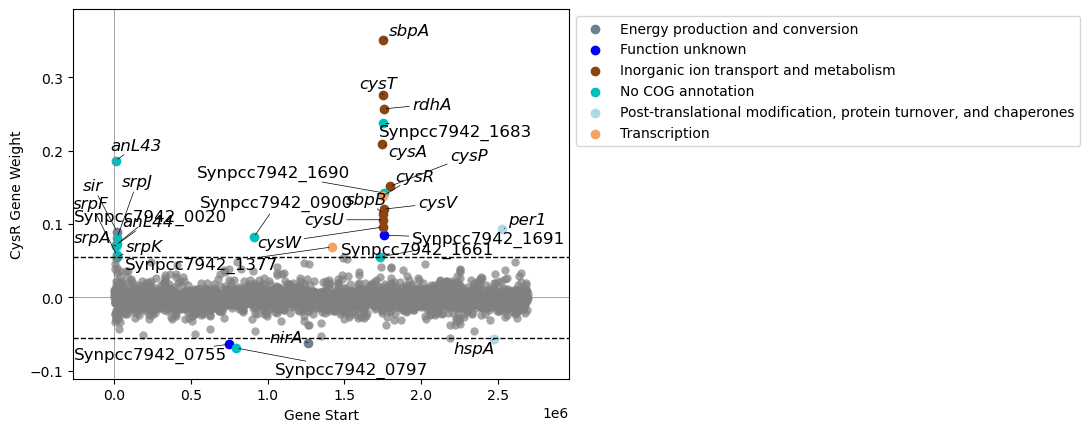

In [114]:
plot_gene_weights(ica_data,'CysR',show_labels=True)
plt.savefig('../data/Figures/CysR.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:ylabel='RpaA iModulon\nActivity'>

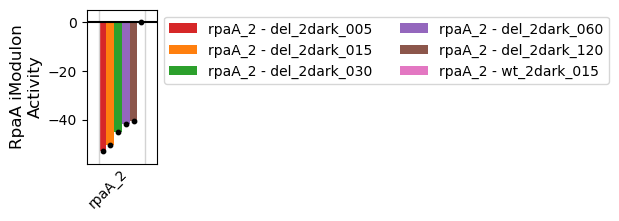

In [141]:
plot_activities(ica_data,'RpaA',projects='rpaA_2')

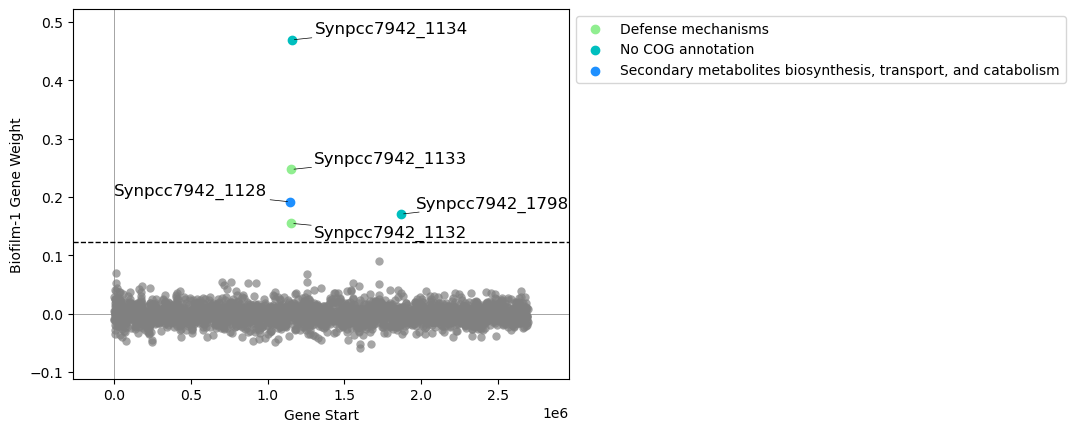

In [153]:
plot_gene_weights(ica_data,'Biofilm-1')
plt.savefig('../data/Figures/biofilm1.pdf',bbox_inches='tight',transparent=True)

In [154]:
de_biofilm = pd.read_excel('/home/annie/Downloads/Data_Sheet_2.XLSX',sheet_name='6) DEG Summary',
                           header=7)

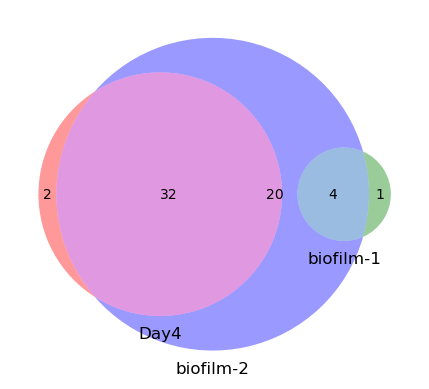

In [156]:
venn3([set(de_biofilm[de_biofilm[de_biofilm.columns[16]] == 'Down'].ORF),
       set(ica_data.view_imodulon('Biofilm-1').index),
       set(ica_data.view_imodulon('Biofilm-2').index)],
       set_labels=['Day4','biofilm-1','biofilm-2'])
plt.savefig('../data/Figures/biofilm_venn.pdf',bbox_inches='tight',transparent=True)

In [157]:
de = pd.read_excel('/home/annie/Downloads/pnas.2211789119.sd01.xlsx',index_col=0)
de_15m = de[(de['log2FoldChange_15m'] > 2) | (de['log2FoldChange_15m'] < -2) & (de['padj_15m'] < 0.05)]

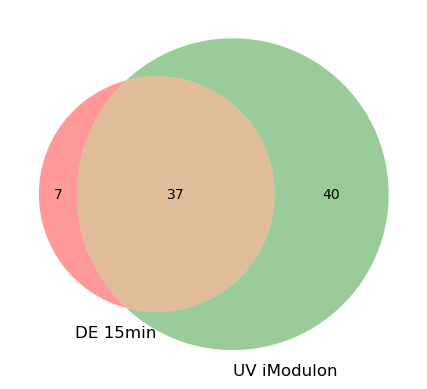

In [158]:
venn2([set(de_15m.index),set(ica_data.view_imodulon('UV').index)],set_labels=('DE 15min','UV iModulon'))
plt.savefig('../data/Figures/uv_venn.pdf',bbox_inches='tight',transparent=True)

<AxesSubplot:xlabel='NtcA-1 Gene Weight', ylabel='NtcA-2 Gene Weight'>

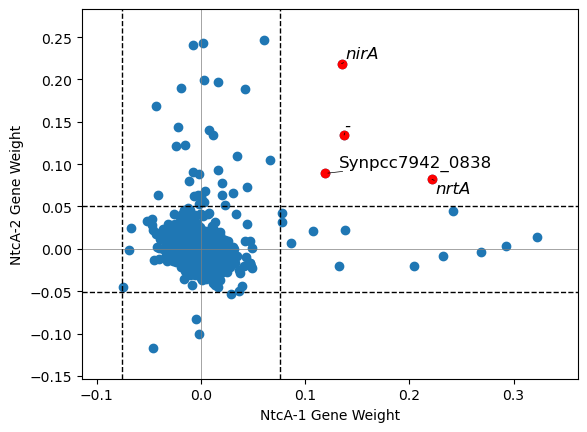

In [138]:
compare_gene_weights(ica_data,'NtcA-1','NtcA-2')

<AxesSubplot:xlabel='state_transition Gene Weight', ylabel='competence Gene Weight'>

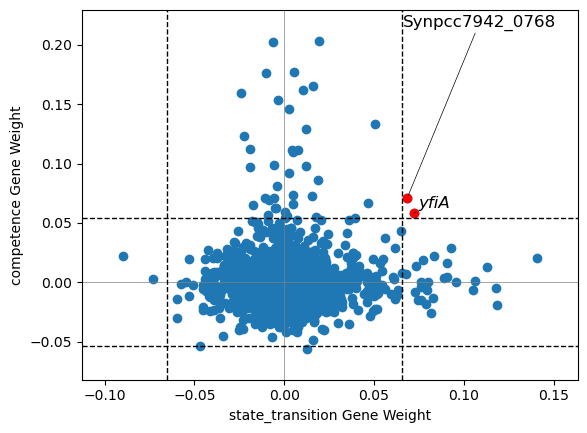

In [123]:
compare_gene_weights(ica_data,'state_transition','competence')

<AxesSubplot:xlabel='state_transition Gene Weight', ylabel='unchar_3 Gene Weight'>

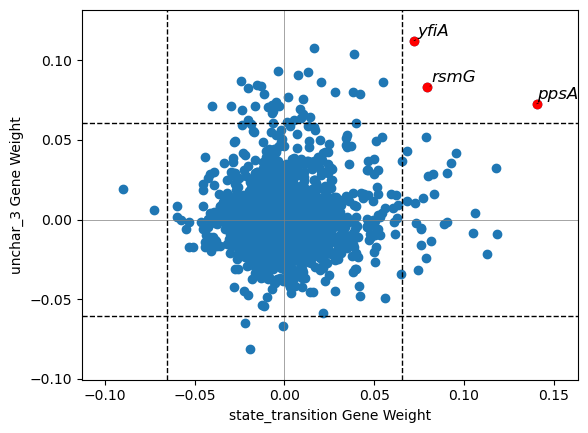

In [124]:
compare_gene_weights(ica_data,'state_transition','unchar_3')

<AxesSubplot:xlabel='competence Gene Weight', ylabel='unchar_3 Gene Weight'>

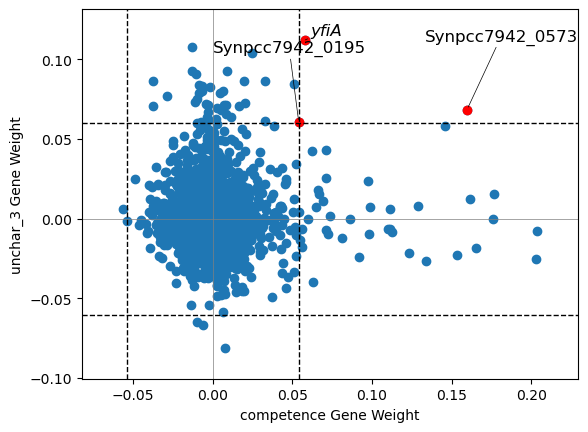

In [125]:
compare_gene_weights(ica_data,'competence','unchar_3')

In [142]:
def light3_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ["SRX3211304", "SRX3211305"]
    _2h = ["SRX3211306", "SRX3211307"]
    _4h = ["SRX3211308", "SRX3211309"]
    _6h = ["SRX3211310", "SRX3211311"]
    _8h = ["SRX3211312", "SRX3211313"]
    _9h = ["SRX3211314", "SRX3211315"]
    _10h = ["SRX3211316", "SRX3211317"]
    _12h = ["SRX3211318", "SRX3211319"]
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['LL_2h','LL_4h','LL_6h',
                                                                            'LL_8h','LL_9h','LL_10h','LL_12h'])
    return activity_df

In [143]:
def light4_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ['SRX3211320','SRX3211321']
    _2h = ['SRX3211322','SRX3211323']
    _4h = ['SRX3211324','SRX3211325']
    _6h = ['SRX3211326','SRX3211327']
    _8h = ['SRX3211328','SRX3211329']
    _9h = ['SRX3211330','SRX3211331']
    _10h = ['SRX3211332','SRX3211333']
    _12h = ['SRX3211334','SRX3211335']
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['CD_2h','CD_4h','CD_6h',
                                                                            'CD_8h','CD_9h','CD_10h','CD_12h'])
    return activity_df

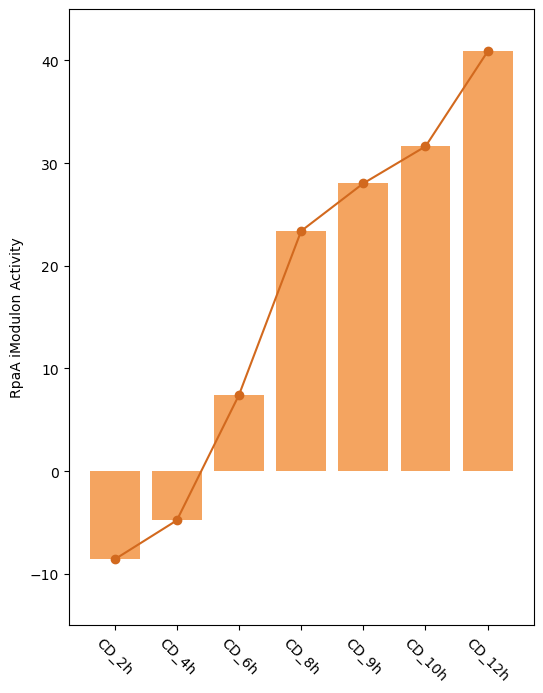

In [144]:
plt.figure(figsize=(6,8))
plt.bar(light4_activity(ica_data,['RpaA']).T.index,height=light4_activity(ica_data,['RpaA']).loc['RpaA'],
       color='sandybrown')
plt.plot(light4_activity(ica_data,['RpaA']).T,'-o',color='chocolate')
plt.xticks(rotation=-45)
plt.ylabel('RpaA iModulon Activity')
plt.ylim([-15,45])
# plt.savefig('/home/annie/Documents/Clear_day.pdf',bbox_inches='tight')
None

<AxesSubplot:ylabel='unchar_11 iModulon\nActivity'>

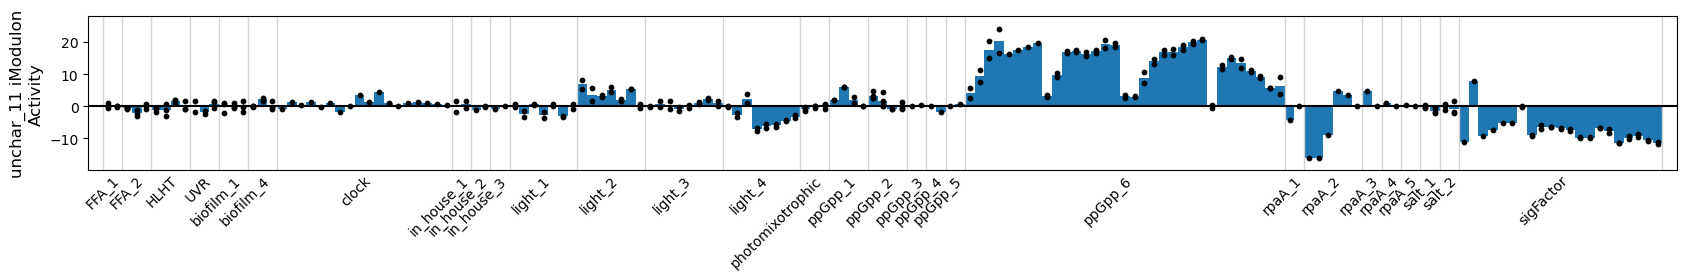

In [160]:
plot_activities(ica_data,'unchar_11')

In [168]:
np.unique(ica_data.sample_table.project)

array(['FFA_1', 'FFA_2', 'HLHT', 'UVR', 'biofilm_1', 'biofilm_4', 'clock',
       'in_house_1', 'in_house_2', 'in_house_3', 'light_1', 'light_2',
       'light_3', 'light_4', 'photomixotrophic', 'ppGpp_1', 'ppGpp_2',
       'ppGpp_3', 'ppGpp_4', 'ppGpp_5', 'ppGpp_6', 'rpaA_1', 'rpaA_2',
       'rpaA_3', 'rpaA_4', 'rpaA_5', 'salt_1', 'salt_2', 'sigFactor'],
      dtype=object)

In [180]:
ica_data.sample_table['Date'] = ica_data.sample_table['ReleaseDate'].str[:-9]

In [196]:
data = ica_data.sample_table
data = data.sort_values('ReleaseDate')
data.head()

Run          ReleaseDate             LoadDate       spots  \
SRX359381  SRR1001865  2013-12-04 16:41:15  2013-09-24 07:26:57   9956083.0   
SRX359368  SRR1001852  2013-12-04 16:41:15  2013-09-24 07:27:21  11935064.0   
SRX359369  SRR1001853  2013-12-04 16:41:15  2013-09-24 07:27:58  14202263.0   
SRX359370  SRR1001854  2013-12-04 16:41:15  2013-09-24 07:27:23  11456135.0   
SRX359371  SRR1001855  2013-12-04 16:41:15  2013-09-24 07:27:32  12173405.0   

                 bases  spots_with_mates  avgLength  size_MB  AssemblyName  \
SRX359381  507760233.0               0.0       51.0    277.0           NaN   
SRX359368  608688264.0               0.0       51.0    327.0           NaN   
SRX359369  724315413.0               0.0       51.0    390.0           NaN   
SRX359370  584262885.0               0.0       51.0    313.0           NaN   
SRX359371  620843655.0               0.0       51.0    337.0           NaN   

                                               download_path  ...  \
SRX359381  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX359368  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX359369  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX359370  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX359371  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   

          fluorescent light intensity light_flux_umol/m2/s skip passed_fastqc  \
SRX359381               NaN       NaN                  NaN  NaN          True   
SRX359368               NaN       NaN                  NaN  NaN          True   
SRX359369               NaN       NaN                  NaN  NaN          True   
SRX359370               NaN       NaN                  NaN  NaN          True   
SRX359371               NaN       NaN                  NaN  NaN          True   

           passed_reads_mapped_to_CDS  passed_global_correlation  \
SRX359381                        True                       True   
SRX359368                        True                       True   
SRX359369                        True                       True   
SRX359370                        True                       True   
SRX359371                        True                       True   

                      full_name passed_replicate_correlations        Date  
SRX359381  clock:empty_IPTG_00h                          True  2013-12-04  
SRX359368          clock:wt_32h                          True  2013-12-04  
SRX359369          clock:wt_36h                          True  2013-12-04  
SRX359370          clock:wt_40h                          True  2013-12-04  
SRX359371          clock:wt_44h                          True  2013-12-04  

[5 rows x 81 columns]

In [214]:
data = pd.read_csv('../metadata_combined.tsv',sep='\t',index_col=0)
data['Date'] = data['ReleaseDate'].str[0:4]
data

Run          ReleaseDate             LoadDate       spots  \
Experiment                                                                      
DRX275049     DRR285592  2022-12-19 11:18:03  2022-12-19 11:16:00   1585969.0   
DRX275050     DRR285593  2022-12-19 11:18:03  2022-12-19 11:15:43   1069483.0   
SRX030250     SRR071383  2010-11-05 00:47:55  2014-05-28 12:07:04  47786325.0   
SRX030251     SRR071374  2010-11-05 01:28:21  2014-05-28 12:14:58  54047889.0   
SRX030252     SRR071385  2010-11-04 23:56:08  2014-05-28 12:50:26  51877934.0   
...                 ...                  ...                  ...         ...   
km_LL_2             NaN                  NaN                  NaN         NaN   
wt_dark_4h_1        NaN                  NaN                  NaN         NaN   
wt_dark_4h_2        NaN                  NaN                  NaN         NaN   
wt_LL_1             NaN                  NaN                  NaN         NaN   
wt_LL_2             NaN                  NaN                  NaN         NaN   

                     bases  spots_with_mates  avgLength  size_MB  \
Experiment                                                         
DRX275049     2.373925e+08         1585969.0      149.0    114.0   
DRX275050     1.629813e+08         1069483.0      152.0     72.0   
SRX030250     1.720308e+09               0.0       36.0   9794.0   
SRX030251     1.945724e+09               0.0       36.0  12703.0   
SRX030252     1.867606e+09               0.0       36.0  12166.0   
...                    ...               ...        ...      ...   
km_LL_2                NaN               NaN        NaN      NaN   
wt_dark_4h_1           NaN               NaN        NaN      NaN   
wt_dark_4h_2           NaN               NaN        NaN      NaN   
wt_LL_1                NaN               NaN        NaN      NaN   
wt_LL_2                NaN               NaN        NaN      NaN   

              AssemblyName                                      download_path  \
Experiment                                                                      
DRX275049              NaN  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...   
DRX275050              NaN  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...   
SRX030250              NaN  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...   
SRX030251              NaN  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...   
SRX030252              NaN  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...   
...                    ...                                                ...   
km_LL_2                NaN                                                NaN   
wt_dark_4h_1           NaN                                                NaN   
wt_dark_4h_2           NaN                                                NaN   
wt_LL_1                NaN                                                NaN   
wt_LL_2                NaN                                                NaN   

              ... CenterName Submission dbgap_study_accession Consent  \
Experiment    ...                                                       
DRX275049     ...     TUAGRI  DRA011784                   NaN  public   
DRX275050     ...     TUAGRI  DRA011784                   NaN  public   
SRX030250     ...        JGI  SRA026005                   NaN  public   
SRX030251     ...        JGI  SRA026005                   NaN  public   
SRX030252     ...        JGI  SRA026005                   NaN  public   
...           ...        ...        ...                   ...     ...   
km_LL_2       ...        NaN        NaN                   NaN     NaN   
wt_dark_4h_1  ...        NaN        NaN                   NaN     NaN   
wt_dark_4h_2  ...        NaN        NaN                   NaN     NaN   
wt_LL_1       ...        NaN        NaN                   NaN     NaN   
wt_LL_2       ...        NaN        NaN                   NaN     NaN   

                                       RunHash  \
Experiment                 

In [215]:
sample_count = data.groupby('Date').size().reset_index(name='SampleCount')

In [216]:
sample_count = sample_count.sort_values('Date')
sample_count['CumulativeSampleCount'] = sample_count['SampleCount'].cumsum()
sample_count

Date  SampleCount  CumulativeSampleCount
0  2010           13                     13
1  2011            3                     16
2  2013           18                     34
3  2015           18                     52
4  2017          184                    236
5  2018            4                    240
6  2019           76                    316
7  2020            1                    317
8  2022           46                    363
9  2023           30                    393

In [243]:
set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id).intersection(ica_data.view_imodulon('NtcA-2').index)

{'Synpcc7942_0127',
 'Synpcc7942_1239',
 'Synpcc7942_1240',
 'Synpcc7942_1241',
 'Synpcc7942_1242',
 'Synpcc7942_1845',
 'Synpcc7942_2107'}

<AxesSubplot:xlabel='NtcA-2 iModulon Activity', ylabel='ccm-2 iModulon Activity'>

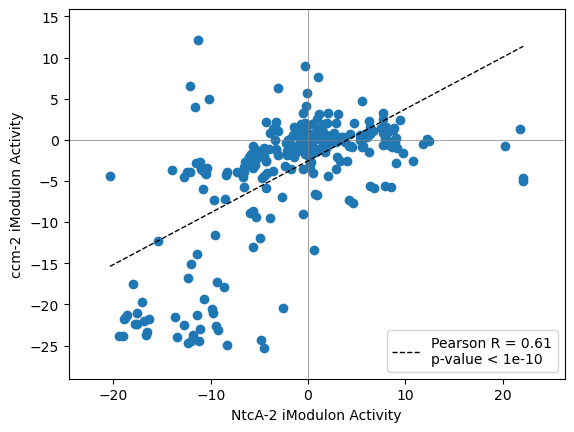

In [263]:
compare_activities(ica_data,'NtcA-2','ccm-2')

In [254]:
ica_data.view_imodulon('NtcA-1')

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0442     0.107254             amt1  CP000100.1           NaN   
Synpcc7942_0836     0.086449  Synpcc7942_0836  CP000100.1           NaN   
Synpcc7942_0837     0.138456  Synpcc7942_0837  CP000100.1           NaN   
Synpcc7942_0838     0.119122  Synpcc7942_0838  CP000100.1           NaN   
Synpcc7942_1034     0.077519  Synpcc7942_1034  CP000100.1           NaN   
Synpcc7942_1235     0.204324             narB  CP000100.1           NaN   
Synpcc7942_1236     0.268362             nrtD  CP000100.1           NaN   
Synpcc7942_1237     0.293037             nrtC  CP000100.1           NaN   
Synpcc7942_1238     0.322053             nrtB  CP000100.1           NaN   
Synpcc7942_1239     0.221667             nrtA  CP000100.1           NaN   
Synpcc7942_1240     0.134894             nirA  CP000100.1           NaN   
Synpcc7942_2104     0.132676             cynS  CP000100.1           NaN   
Synpcc7942_2105     0.231792             cynD  CP000100.1           NaN   
Synpcc7942_2106     0.241646             cynB  CP000100.1           NaN   
Synpcc7942_2107     0.137319                -  CP000100.1           NaN   
Synpcc7942_2156     0.077960             glnA  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_0442   431458   432951      +   
Synpcc7942_0836   831166   832182      -   
Synpcc7942_0837   832179   832811      -   
Synpcc7942_0838   832860   833957      -   
Synpcc7942_1034  1048952  1049815      +   
Synpcc7942_1235  1255757  1257946      -   
Synpcc7942_1236  1258144  1258968      -   
Synpcc7942_1237  1258978  1260957      -   
Synpcc7942_1238  1260972  1261811      -   
Synpcc7942_1239  1261868  1263199      -   
Synpcc7942_1240  1263263  1264801      -   
Synpcc7942_2104  2184740  2185180      -   
Synpcc7942_2105  2185191  2186060      -   
Synpcc7942_2106  2186064  2186855      -   
Synpcc7942_2107  2186865  2188454      -   
Synpcc7942_2156  2239305  2240726      -   

                                                      gene_product  \
Synpcc7942_0442                               ammonium transporter   
Synpcc7942_0836                     conserved hypothetical protein   
Synpcc7942_0837                     conserved hypothetical protein   
Synpcc7942_0838                      Elongator protein 3/MiaB/NifB   
Synpcc7942_1034                              Transglutaminase-like   
Synpcc7942_1235  assimilatory nitrate reductase (ferredoxin) pr...   
Synpcc7942_1236     nitrate transport ATP-binding subunits C and D   
Synpcc7942_1237     nitrate transport ATP-binding subunits C and D   
Synpcc7942_1238                         nitrate transport permease   
Synpcc7942_1239  ABC-type nitrate/nitrite transport system subs...   
Synpcc7942_1240  assimilatory nitrite reductase (ferredoxin) pr...   
Synpcc7942_2104                                      cyanate lyase   
Synpcc7942_2105     nitrate transport ATP-binding subunits C and D   
Synpcc7942_2106                         nitrate transport permease   
Synpcc7942_2107  ABC-type nitrate/sulfonate/bicarbonate transpo...   
Synpcc7942_2156                             L-glutamine synthetase   

                                                    COG uniprot  operon  \
Synpcc7942_0442  Inorganic ion transport and metabolism  Q31R45   Op355   
Synpcc7942_0836                        Function unknown  Q31Q02   Op642   
Synpcc7942_0837                           Transcription  Q31Q01   Op642   
Synpcc7942_0838                        Function unknown  Q31Q00   Op643   
Synpcc7942_1034     Amino acid transport and metabolism  Q31PF5   Op789   
Synpcc7942_1235        Energy production and conversion  P39458   Op934   
Synpcc7942_1236  Inorganic ion transport and metabolism  P38046   Op934   
Synpcc7942_1237                       No COG annotation  P38045   Op934   
Synpcc7942_1238  Inorganic ion transport and metabolism  P38044   Op934   
Synpcc7942_1239  Inorganic ion transport and metabo

In [252]:
ica_data.view_imodulon('NtcA-2').loc[set(ica_data.view_imodulon('NtcA-2').index)-set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id)-set(ica_data.trn[ica_data.trn.regulator=='ntcB'].gene_id)-set(ica_data.view_imodulon('NtcA-1').index)]

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_1036     0.240928  Synpcc7942_1036  CP000100.1           NaN   
Synpcc7942_1032     0.197278  Synpcc7942_1032  CP000100.1           NaN   
Synpcc7942_1363     0.061881  Synpcc7942_1363  CP000100.1           NaN   
Synpcc7942_2279     0.073169             amtB  CP000100.1           NaN   
Synpcc7942_0342     0.080609  Synpcc7942_0342  CP000100.1           NaN   
Synpcc7942_1039     0.242701  Synpcc7942_1039  CP000100.1           NaN   
Synpcc7942_0839     0.189129  Synpcc7942_0839  CP000100.1           NaN   
Synpcc7942_0169     0.091217             glnN  CP000100.1           NaN   
Synpcc7942_1655    -0.052922  Synpcc7942_1655  CP000100.1           NaN   
Synpcc7942_1033     0.105096  Synpcc7942_1033  CP000100.1           NaN   
Synpcc7942_1798     0.063167  Synpcc7942_1798  CP000100.1           NaN   
Synpcc7942_1714     0.092835             metX  CP000100.1           NaN   
Synpcc7942_0303     0.168140  Synpcc7942_0303  CP000100.1           NaN   
Synpcc7942_2296     0.057429             glnT  CP000100.1           NaN   
Synpcc7942_2466     0.063285  Synpcc7942_2466  CP000100.1           NaN   
Synpcc7942_0115     0.054752                -  CP000100.1           NaN   
Synpcc7942_1797     0.190014  Synpcc7942_1797  CP000100.1           NaN   
Synpcc7942_0365     0.143965  Synpcc7942_0365  CP000100.1           NaN   
Synpcc7942_0841     0.140384  Synpcc7942_0841  CP000100.1           NaN   
Synpcc7942_1538     0.051211  Synpcc7942_1538  CP000100.1           NaN   
Synpcc7942_1764     0.062791  Synpcc7942_1764  CP000100.1           NaN   
Synpcc7942_1745    -0.082492  Synpcc7942_1745  CP000100.1           NaN   
Synpcc7942_0569     0.052823            sigA4  CP000100.1           NaN   
Synpcc7942_0934     0.122549  Synpcc7942_0934  CP000100.1           NaN   
Synpcc7942_1707     0.121883             ftn6  CP000100.1           NaN   
Synpcc7942_2419     0.066320  Synpcc7942_2419  CP000100.1           NaN   
Synpcc7942_2529    -0.117023  Synpcc7942_2529  CP000100.1           NaN   
Synpcc7942_0037     0.088739  Synpcc7942_0037  CP000100.1           NaN   
Synpcc7942_0891     0.199599  Synpcc7942_0891  CP000100.1           NaN   
Synpcc7942_1713     0.134419             mocD  CP000100.1           NaN   
Synpcc7942_0840     0.246709  Synpcc7942_0840  CP000100.1           NaN   
Synpcc7942_1477     0.067913  Synpcc7942_1477  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_1036  1050754  1051257      +   
Synpcc7942_1032  1046506  1047972      +   
Synpcc7942_1363  1402353  1402640      +   
Synpcc7942_2279  2347614  2349026      +   
Synpcc7942_0342   336363   336590      +   
Synpcc7942_1039  1053877  1054353      -   
Synpcc7942_0839   833950   834954      -   
Synpcc7942_0169   168176   170347      +   
Synpcc7942_1655  1725260  1725829      -   
Synpcc7942_1033  1047992  1048948      +   
Synpcc7942_1798  1867864  1868490      +   
Synpcc7942_1714  1782216  1783232      +   
Synpcc7942_0303   301543   302697      +   
Synpcc7942_2296  2366072  2367376      -   
Synpcc7942_2466  2546850  2547557      +   
Synpcc7942_0115   113631   114146      -   
Synpcc7942_1797  1866873  1867376      +   
Synpcc7942_0365   356676   357305      +   
Synpcc7942_0841   835671   837011      +   
Synpcc7942_1538  1596968  1597366      +   
Synpcc7942_1764  1831862  1832230      +   
Synpcc7942_1745  1815848  1816393      -   
Synpcc7942_0569   550718   551653      -   
Synpcc7942_0934   940995   942056      +   
Synpcc7942_1707  1775633  1776064      +   
Synpcc7942_2419  2491630  2492154      +   
Synpcc7942_2529  2610753  2611037      -   
Synpcc7942_0037    36123    36326      -   
Synpcc7942_0891   901736   902035      +   
Synpcc7942_1713  1781317  1782219      +   
Synpcc7942_0840   834991   835473      -   
Synpcc7942_1477  1528142  1530337      -   

                                                      gene_product  \
Synpcc7942_1036   

<AxesSubplot:xlabel='NtcA-1 Gene Weight', ylabel='NtcA-2 Gene Weight'>

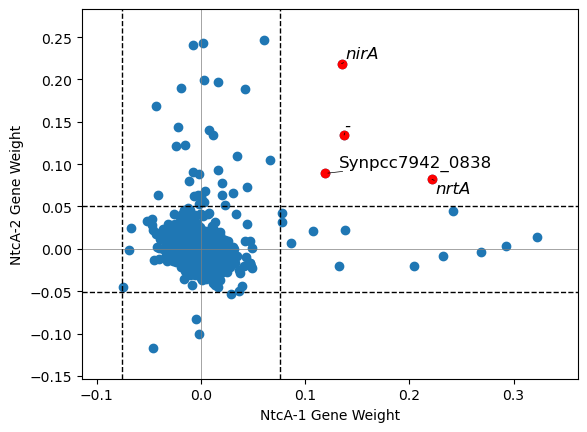

In [249]:
compare_gene_weights(ica_data,'NtcA-1','NtcA-2')

In [245]:
ica_data.view_imodulon('NtcA-2').loc[set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id).intersection(ica_data.view_imodulon('NtcA-2').index)]

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_1239     0.082060             nrtA  CP000100.1           NaN   
Synpcc7942_0127     0.109176             ntcA  CP000100.1           NaN   
Synpcc7942_1242     0.064023             ntcB  CP000100.1           NaN   
Synpcc7942_1845    -0.100357  Synpcc7942_1845  CP000100.1           NaN   
Synpcc7942_2107     0.134412                -  CP000100.1           NaN   
Synpcc7942_1241     0.077723             nirB  CP000100.1           NaN   
Synpcc7942_1240     0.218714             nirA  CP000100.1           NaN   

                   start      end strand  \
Synpcc7942_1239  1261868  1263199      -   
Synpcc7942_0127   126390   127058      +   
Synpcc7942_1242  1266128  1267057      +   
Synpcc7942_1845  1911652  1911879      +   
Synpcc7942_2107  2186865  2188454      -   
Synpcc7942_1241  1265088  1266137      +   
Synpcc7942_1240  1263263  1264801      -   

                                                      gene_product  \
Synpcc7942_1239  ABC-type nitrate/nitrite transport system subs...   
Synpcc7942_0127        transcriptional regulator%2C Crp/Fnr family   
Synpcc7942_1242           transcriptional regulator%2C LysR family   
Synpcc7942_1845                     conserved hypothetical protein   
Synpcc7942_2107  ABC-type nitrate/sulfonate/bicarbonate transpo...   
Synpcc7942_1241                  nitrite reductase related protein   
Synpcc7942_1240  assimilatory nitrite reductase (ferredoxin) pr...   

                                                    COG uniprot  operon  \
Synpcc7942_1239  Inorganic ion transport and metabolism  P38043   Op934   
Synpcc7942_0127                           Transcription  P29283   Op133   
Synpcc7942_1242                           Transcription  P52693   Op935   
Synpcc7942_1845                       No COG annotation  Q8GJN7  Op1394   
Synpcc7942_2107  Inorganic ion transport and metabolism  Q31LD2  Op1583   
Synpcc7942_1241                       No COG annotation  Q55283   Op935   
Synpcc7942_1240        Energy production and conversion  P39661   Op934   

                 regulator  
Synpcc7942_1239  ntcA,ntcB  
Synpcc7942_0127       ntcA  
Synpcc7942_1242  ntcA,ntcB  
Synpcc7942_1845  ntcA,ntcA  
Synpcc7942_2107       ntcA  
Synpcc7942_1241  ntcA,ntcB  
Synpcc7942_1240  ntcA,ntcB

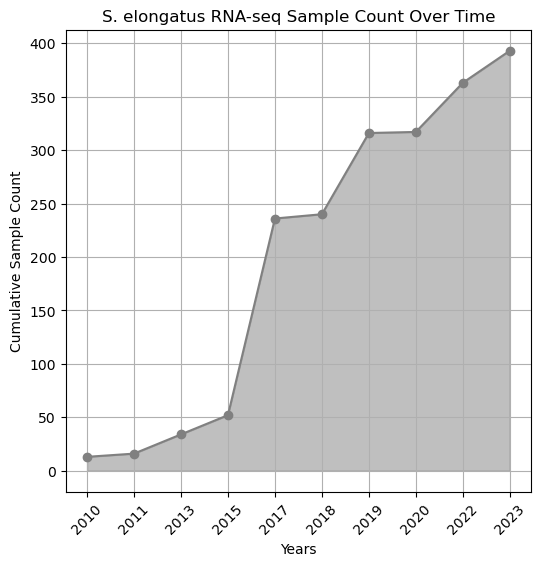

In [226]:
# Plotting the line chart
plt.figure(figsize=(6, 6))
plt.plot(sample_count['Date'], sample_count['CumulativeSampleCount'], marker='o', color='gray')
plt.title('S. elongatus RNA-seq Sample Count Over Time')
plt.fill_between(sample_count['Date'], sample_count['CumulativeSampleCount'], color='grey', alpha=0.5)
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Sample Count')
plt.grid(True)
# plt.show()
plt.savefig('/home/annie/Documents/selon/data/Figures/rna.pdf',bbox_inches='tight',transparent=True)

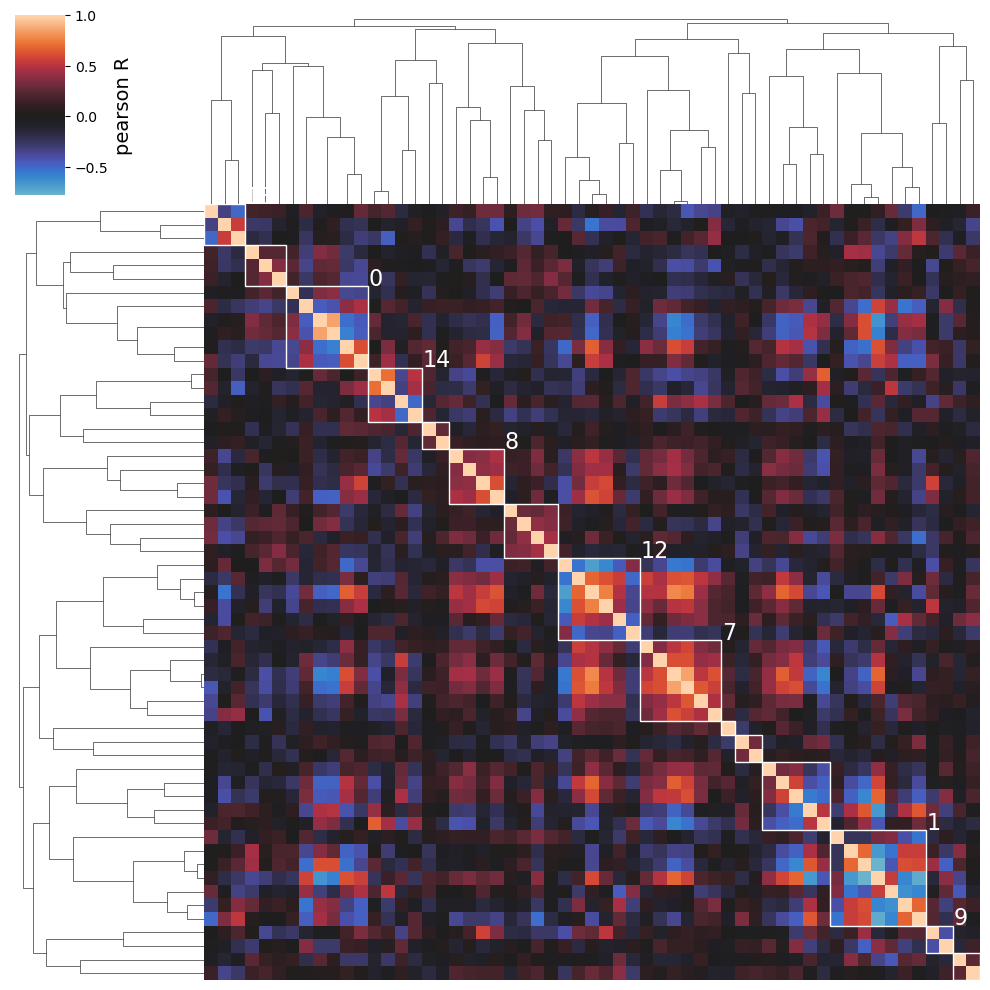

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.8, linkage='complete',
                         n_clusters=None)]

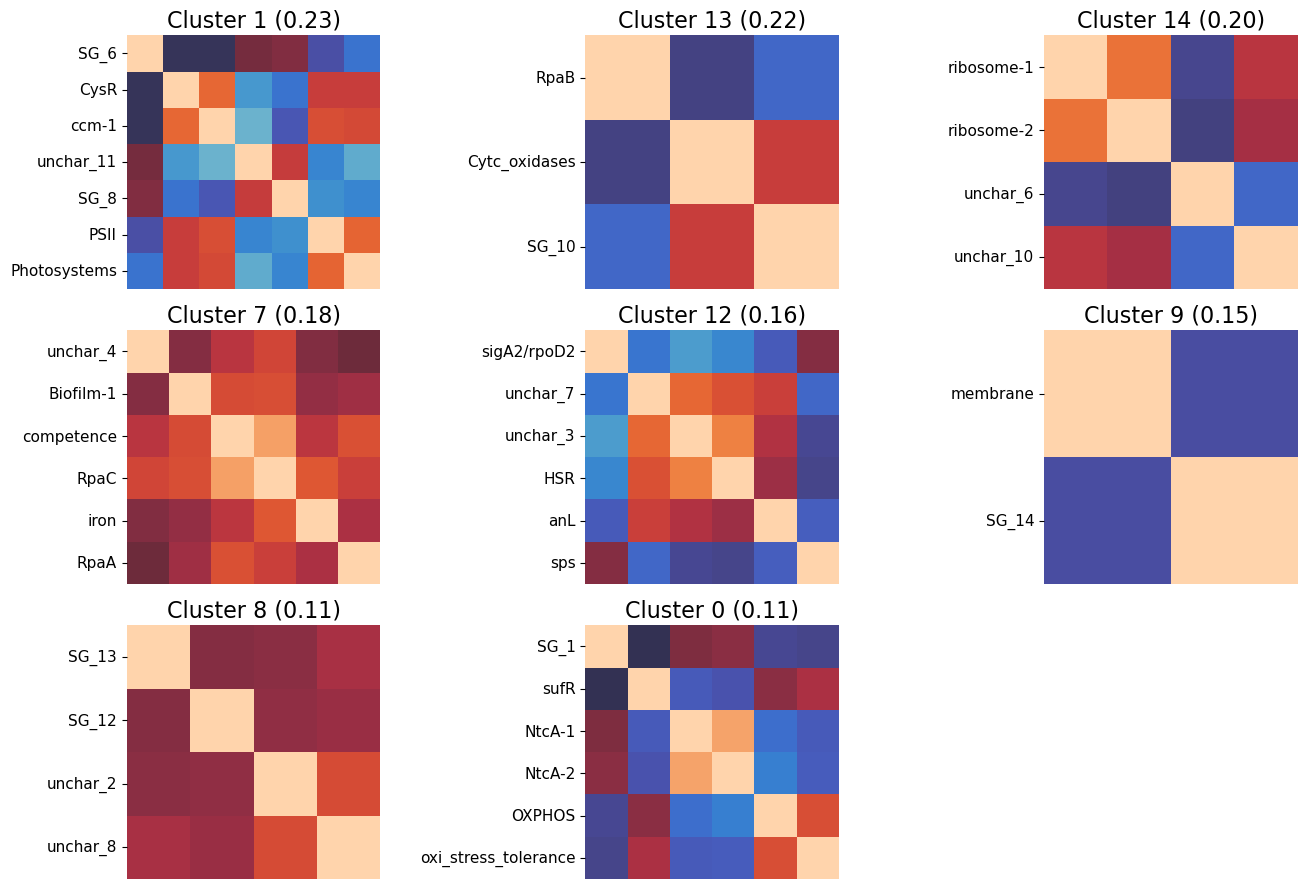

In [430]:
cluster_activities(ica_data,
                   distance_threshold=0.8,
                   show_best_clusters=True,
                   correlation_method = 'pearson')

<AxesSubplot:xlabel='RpaB iModulon Activity', ylabel='RpaA iModulon Activity'>

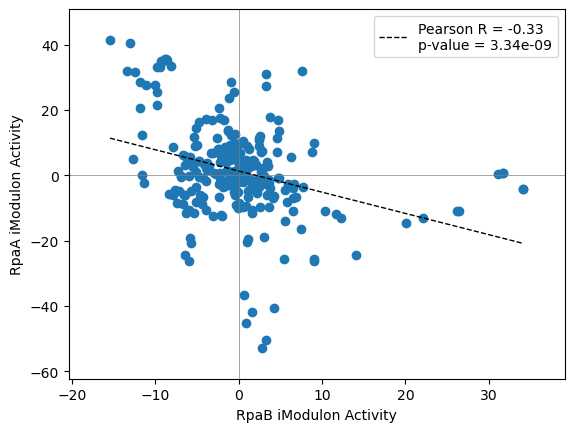

In [428]:
compare_activities(ica_data,'RpaB','RpaA')

In [499]:
syn = pd.read_excel('/home/annie/Downloads/mmc4.xlsx',skiprows=1)

In [500]:
syn.columns

Index(['Regulon of high probability', 'location', 'TU_ID', 'alternative TSS',
       'potential regulated TU', 'coding TU', 'genes', 'ncRNA', 'asRNA',
       'Log2(HL/Median)', 'motif_start (from TSS) [nt]',
       'motif_end (from TSS) [nt]', 'motif_location [nt]',
       'relativeScore_best', 'relativeScore_all', 'motif_strand',
       'motif_sequence', 'proposed regulation_best',
       'proposed regulation_total',
       'HLR1 combined rank (relative expression + relative score)',
       'probability ', 'cluster_ID (best only; manually edited = grey)',
       'Cluster', 'locustags', 'genenames',
       'functional categories (cyanobase)', 'annotations_cyanobase',
       'annotations_mbgd', 'relative score', 'probability', 'cluster',
       'cluster*', 'reported target (Synechocystis 6803)',
       'reported target (other species)', 'in-detail analysis'],
      dtype='object')

In [501]:
# Assuming your DataFrame is named 'syn' and the relevant columns are 'col1', 'col2', 'col3', and 'col4'
# syn = syn[(syn['relative score'] == 'yes') & (syn['probability'] == 'yes') & ((syn['cluster'] == 'yes') | (syn['cluster*'] == 'yes'))]
syn = syn[syn['Regulon of high probability'] == 'yes']

In [503]:
# syn.locustags.astype(str).values.flatten().tolist()

# Assuming your list is named 'my_list'
locus_list = []
for item in syn.locustags.astype(str).values.flatten().tolist():
    if ',' in item:
        # Split the string on commas and extend the locus_list
        locus_list.extend(item.split(', '))
    else:
        # Add the original item to the locus_list
        locus_list.append(item)

In [504]:
# Assuming your list is named 'my_list'
gene_list = []
for item in syn.genenames.astype(str).values.flatten().tolist():
    if ',' in item:
        # Split the string on commas and extend the gene_list
        gene_list.extend(item.split(', '))
    else:
        # Add the original item to the gene_list
        gene_list.append(item)

In [508]:
syn_list = np.unique(locus_list+gene_list)

In [515]:
bbh = pd.read_csv('/home/annie/Documents/syc_prot_vs_selon_prot_parsed.csv',index_col=0)
bbh = bbh[bbh.PID>=50]
bbh.head()

gene          subject     PID  alnLength  mismatchCount  gapOpenCount  \
0       sds  Synpcc7942_2362  69.876        322             97             0   
2   slr0612  Synpcc7942_1514  53.846        169             67             1   
6   sll1214  Synpcc7942_1907  70.670        358            105             0   
12     rfbD  Synpcc7942_1342  62.463        341            109             3   
21     speA  Synpcc7942_1037  63.027        641            226             3   

    queryStart  queryEnd  subjectStart  subjectEnd           eVal  bitScore  \
0            1       322             1         322  8.800000e-163     453.0   
2            1       169            41         198   1.010000e-56     174.0   
6            1       358             1         358   0.000000e+00     554.0   
12           5       328             4         342  7.430000e-155     436.0   
21          19       659            16         645   0.000000e+00     847.0   

    gene_length       COV  BBH  
0           323  0.996904  <=>  
2           185  0.913514  <=>  
6           358  1.000000  <=>  
12          362  0.941989  <=>  
21          659  0.972686  <=>

In [516]:
mapping = dict(zip(bbh['subject'], bbh['gene']))

In [505]:
selon = np.unique([mapping[name] for name in locus_list if name in mapping] + [mapping[name] for name in gene_list if name in mapping])

In [517]:
rpab_imod = ica_data.view_imodulon('RpaB').index

In [523]:
[mapping[name] for name in rpab_imod if name in mapping]

['sll1541',
 'slr0642',
 'psbO',
 'ftsH',
 'apcA',
 'sll0487',
 'psaC',
 'rpoD',
 'hemF',
 'sll0195',
 'psaK',
 'slr1293',
 'psaD',
 'pcC',
 'pcB',
 'pcA',
 'pcE',
 'sll1071',
 'slr0116',
 'psaJ',
 'psaF',
 'psaE',
 'slr1990',
 'psbA3',
 'ndhD2',
 'slr0947',
 'rtQ',
 'petJ',
 'psbD2',
 'sll0005',
 'ho1',
 'pds',
 'pcG',
 'hlH',
 'apcF',
 'slr1747',
 'psaI',
 'rtA',
 'sds',
 'pcr']

In [536]:
rpab_chip = pd.read_excel('/home/annie/Downloads/elife-32032-fig5-data2.xlsx',sheet_name='Replicate 1',skiprows=4)
rpab_chip = rpab_chip[~rpab_chip['Gene target of peak'].isna()]
rpab_chip

RpaB Peak #    Start      End  Peak max location        Q-value  \
4              5    54874    56127              55234   0.000000e+00   
7              8    90192    90556              90364   0.000000e+00   
8              9    94196    94483              94332  1.377536e-144   
9             10   101019   101311             101114  4.465038e-202   
10            10   101019   101311             101114  4.465038e-202   
..           ...      ...      ...                ...            ...   
223          208  2521495  2521955            2521768  5.460981e-210   
226          211  2557996  2558354            2558182   0.000000e+00   
227          212  2562681  2563635            2563251   0.000000e+00   
229          214  2587651  2588183            2588022  3.426928e-318   
232          217  2687906  2688911            2688077  2.281757e-221   

            8      8.25         9       8.1    8.25.1  ...    8.25.3  \
4    4.167617  3.356500  3.617961  5.040483  6.251204  ...  0.310572   
7    7.456045  8.188199  8.084246  9.134513  7.474319  ... -0.289386   
8    2.386691  1.676504  1.733235  2.461696  3.745734  ...  0.605596   
9    3.608251  1.982232  2.006679  3.025490  3.985237  ...  0.397497   
10   3.608251  1.982232  2.006679  3.025490  3.985237  ...  0.397497   
..        ...       ...       ...       ...       ...  ...       ...   
223  2.950441  2.730788  2.968964  3.817261  3.561158  ... -0.100191   
226  5.907208  2.905009  2.742379  4.239393  8.934317  ...  1.075500   
227  5.382434  4.244234  4.561864  4.676983  4.766074  ...  0.027223   
229  5.688840  3.660874  3.831255  4.619542  6.467865  ...  0.485540   
232  3.930694  1.998502  2.258114  3.543225  4.316003  ...  0.284633   

          9.3  Gene target of peak  High confidence class of gene target  8.4  \
4    0.121883      Synpcc7942_0052                                     0    0   
7   -0.322576      Synpcc7942_0091                                     0    0   
8    0.667166      Synpcc7942_0096                                  Dusk    0   
9    0.637951      Synpcc7942_0100                                  Dusk    0   
10   0.637951      Synpcc7942_0101                                  Dawn    0   
..        ...                  ...                                   ...  ...   
223 -0.354688      Synpcc7942_2444                                     0    0   
226  0.757626      Synpcc7942_2476                                  Dusk    0   
227  0.116461      Synpcc7942_2481                                     0    0   
229  0.612682      Synpcc7942_2507                                  Dusk    0   
232  0.217581      Synpcc7942_2605                                     0    0   

       8.25.4       9.4 8.5    8.25.5       9.5  
4    0.133805 -0.427314   0  0.752386 -0.041993  
7    1.965637  0.644295   0  0.454416  0.042261  
8   -3.918255 -3.024300   0  2.226438  1.864662  
9   -3.960017 -2.759362   0  3.079596  4.452884  
10   0.684045  0.296839   0 -0.629991 -0.164333  
..        ...       ...  ..       ...       ...  
223  0.063928  0.294798   0 -0.961866 -0.887204  
226 -1.309279 -0.635472   0  0.794034  0.968405  
227 -0.213936 -0.954842   0 -0.602702  0.204248  
229 -1.193598 -1.268940   0  1.172407  1.683753  
232 -0.746124 -1.140937   0  1.250222  0.925225  

[135 rows x 25 columns]

In [540]:
dusk_dawn = pd.read_excel('~/Downloads/sd1.xlsx',sheet_name = 'Analysis of Circadian Gene Exp',index_col=0)
dusk_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 1]['7942 ID'].dropna()
dawn_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 2]['7942 ID'].dropna()

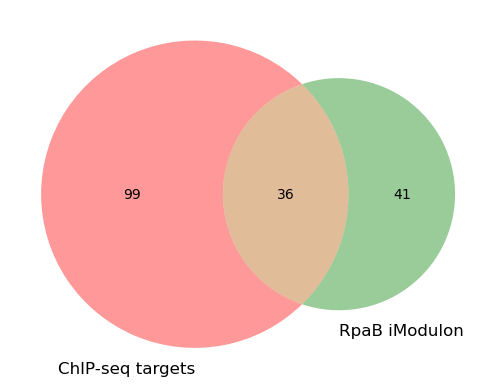

In [621]:
venn2([set(rpab_chip['Gene target of peak']),set(ica_data.view_imodulon('RpaB').index)],
     set_labels=['ChIP-seq targets','RpaB iModulon'])

In [531]:
'Synpcc7942_0501' in ica_data.view_imodulon('RpaB').index

False

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

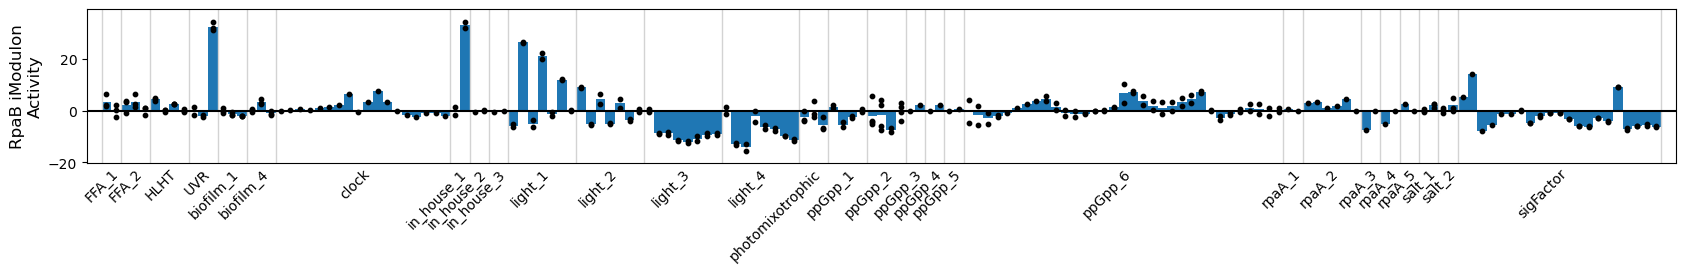

In [548]:
plot_activities(ica_data,'RpaB')

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

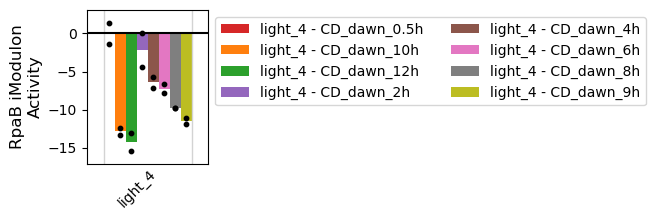

In [620]:
plot_activities(ica_data,'RpaB',projects='light_4')

In [575]:
ica_data.sample_table[['intensity','light_flux_umol/m2/s']]

intensity light_flux_umol/m2/s
SRX259777        NaN                   60
SRX259778        NaN                   60
SRX259779        NaN                   60
SRX259783        NaN                   60
SRX259784        NaN                   60
...              ...                  ...
SRX4105561       NaN                  100
SRX4105564       NaN                  100
SRX4105565       NaN                  100
SRX4105566       NaN                  100
SRX4105568       NaN                  100

[300 rows x 2 columns]

In [580]:
d = dict(zip(ica_data.A.loc['RpaB'],ica_data.sample_table['light_flux_umol/m2/s']))

In [602]:
df=pd.DataFrame(ica_data.sample_table['light_flux_umol/m2/s'])
df['Activity'] = ica_data.A.loc['RpaB']

In [609]:
df.reset_index().drop('index',axis=1)

light_flux_umol/m2/s  Activity
0                     60 -2.356413
1                     60  2.036026
2                     60  0.320387
3                     60  1.866564
4                     60  6.543257
..                   ...       ...
295                  100 -3.352382
296                  100 -5.772849
297                  100 -6.000291
298                  100 -2.905188
299                  100 -3.047540

[300 rows x 2 columns]

In [522]:
syn_list

array(['6803t37', '6803t38 (as)', 'Norf6', 'SyR6', 'SyR9', 'acrD', 'acsF',
       'ahcY', 'apcE (alt TSS)', 'apqZ', 'arsA', 'bcp', 'bicA', 'cas10',
       'cas6-2a', 'cbaB', 'cbiM', 'cbiO2 (as)', 'cbiQ2', 'cbiX', 'cdsA',
       'clpS', 'cpcA', 'cpcB', 'cpcC1', 'cpcC2', 'cpcD (alt TSS)',
       'cpcG1', 'crtQ', 'crtR (alt TSS)', 'csm3', 'csm6 (alt TSS)',
       'csx19', 'cya1', 'cynS', 'desD', 'devA', 'devB', 'devC', 'dgdA',
       'dnaJ', 'dnaK', 'fbaA/fda', 'ffh', 'fhuA', 'fpg', 'ftsH1',
       'ftsH2 (alt TSS)', 'ftsH3', 'fus', 'gcp (as)', 'gcvP', 'glgX',
       'glmU', 'gltX', 'glyQ', 'gpx2', 'grxC', 'gshB', 'gst', 'gyrB',
       'hemH/scpA', 'hhoA', 'hik27 (alt TSS)', 'hik8/sasA (as)',
       'hisG (alt TSS)', 'hliA/scpC', 'hliB/scpD', 'hliC/scpB',
       'hliD/scpE', 'hliR1', 'hypD', 'icfG', 'ileS (as)', 'ilvN', 'ion',
       'isiA', 'isiA (as)', 'kaiA', 'kaiB1', 'kaiB3 (alt TSS)', 'kaiC1',
       'ktrB/ntpJ', 'lexA', 'lysC', 'metK', 'moaA', 'moaC', 'moaD',
       'moaE', 'moeA', 

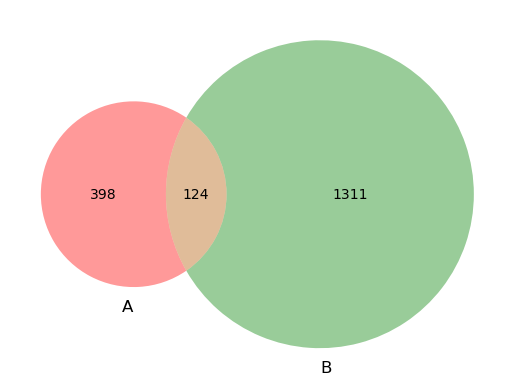

In [511]:
venn2([set(syn_list),set(bbh.gene)])

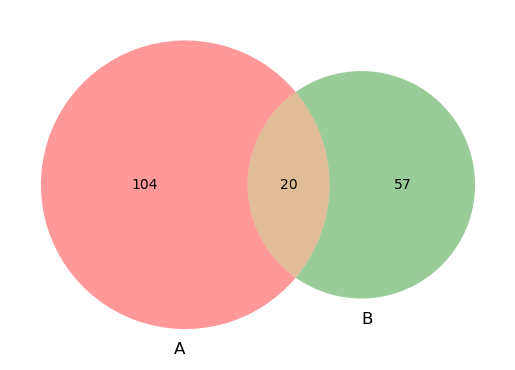

In [507]:
venn2([set(selon),set(ica_data.view_imodulon('RpaB').index)])

<AxesSubplot:xlabel='Cytc_oxidases iModulon Activity', ylabel='RpaC iModulon Activity'>

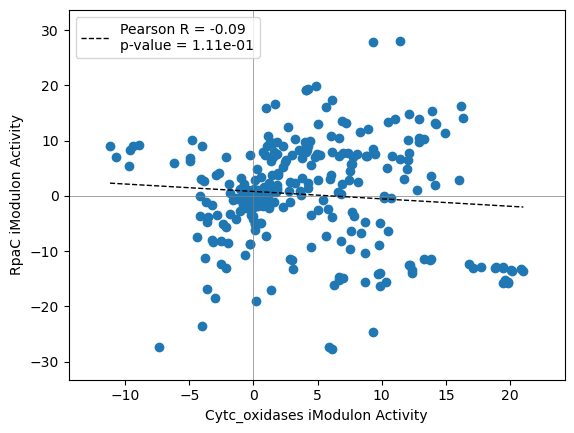

In [441]:
compare_activities(ica_data,'Cytc_oxidases','RpaC')

<AxesSubplot:xlabel='ccm-1 iModulon Activity', ylabel='Photosystems iModulon Activity'>

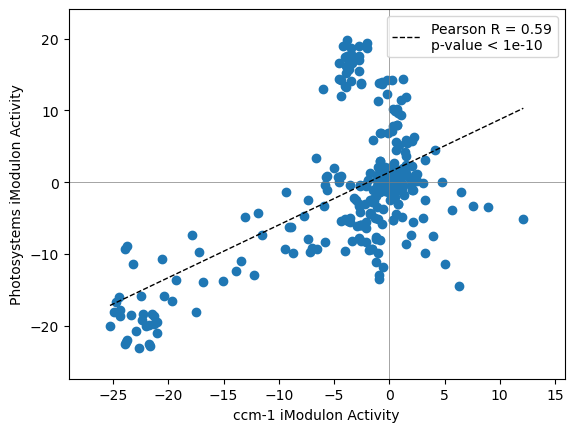

In [301]:
compare_activities(ica_data,'ccm-1','Photosystems')

<AxesSubplot:ylabel='ccm-1 iModulon\nActivity'>

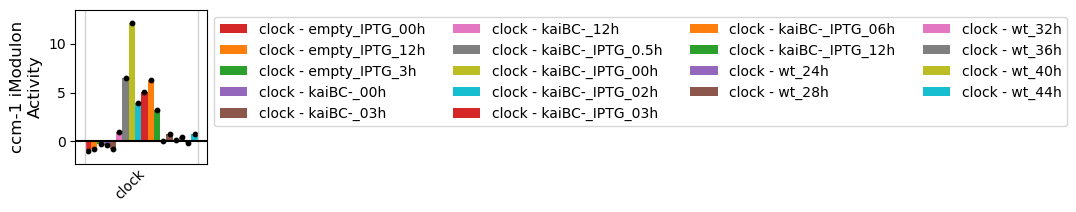

In [302]:
plot_activities(ica_data,'ccm-1',projects='clock')

In [366]:
ica_data.sample_table[ica_data.sample_table.project=='HLHT'].publication[0]

'https://www.nature.com/articles/s41467-023-36964-5'

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

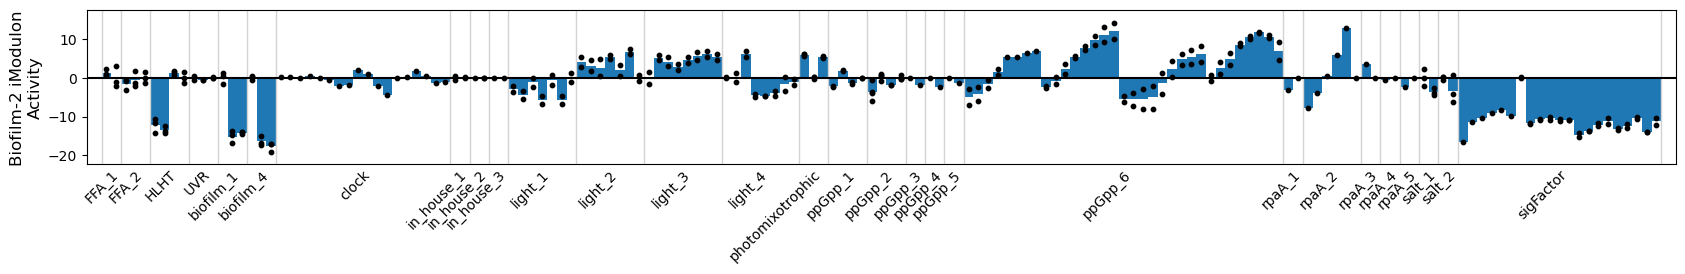

In [368]:
plot_activities(ica_data,'Biofilm-2')

In [386]:
ica_data.view_imodulon('Biofilm-2').sort_values(by='gene_weight',ascending=False)

gene_weight        gene_name   accession old_locus_tag  \
Synpcc7942_0049      0.258774                -  CP000100.1           NaN   
Synpcc7942_2070      0.206815            pilT1  CP000100.1           NaN   
Synpcc7942_1890      0.201919  Synpcc7942_1890  CP000100.1           NaN   
Synpcc7942_2069      0.180399             pilC  CP000100.1           NaN   
Synpcc7942_1821      0.166704  Synpcc7942_1821  CP000100.1           NaN   
Synpcc7942_2483      0.161619  Synpcc7942_2483  CP000100.1           NaN   
Synpcc7942_2482      0.146825  Synpcc7942_2482  CP000100.1           NaN   
Synpcc7942_0048      0.143679                -  CP000100.1           NaN   
Synpcc7942_0046      0.137374  Synpcc7942_0046  CP000100.1           NaN   
Synpcc7942_1839      0.134953  Synpcc7942_1839  CP000100.1           NaN   
Synpcc7942_2366      0.134192  Synpcc7942_2366  CP000100.1           NaN   
Synpcc7942_1822      0.131044  Synpcc7942_1822  CP000100.1           NaN   
Synpcc7942_0047      0.128789  Synpcc7942_0047  CP000100.1           NaN   
Synpcc7942_2481      0.127338  Synpcc7942_2481  CP000100.1           NaN   
Synpcc7942_1399      0.126638  Synpcc7942_1399  CP000100.1           NaN   
Synpcc7942_1148      0.125818  Synpcc7942_1148  CP000100.1           NaN   
Synpcc7942_1400      0.117633             xynA  CP000100.1           NaN   
Synpcc7942_1398      0.115612            bcsA2  CP000100.1           NaN   
Synpcc7942_2480      0.113068            phyA2  CP000100.1           NaN   
Synpcc7942_2068      0.107089  Synpcc7942_2068  CP000100.1           NaN   
Synpcc7942_1298      0.105907  Synpcc7942_1298  CP000100.1           NaN   
Synpcc7942_0195      0.100733  Synpcc7942_0195  CP000100.1           NaN   
Synpcc7942_0055      0.095554  Synpcc7942_0055  CP000100.1           NaN   
Synpcc7942_2301      0.086408  Synpcc7942_2301  CP000100.1           NaN   
Synpcc7942_2349      0.084273            pilT2  CP000100.1           NaN   
Synpcc7942_0657      0.082766  Synpcc7942_0657  CP000100.1           NaN   
Synpcc7942_2547      0.082107  Synpcc7942_2547  CP000100.1           NaN   
Synpcc7942_2096      0.079882  Synpcc7942_2096  CP000100.1           NaN   
Synpcc7942_0522      0.075769  Synpcc7942_0522  CP000100.1           NaN   
Synpcc7942_1811      0.073345  Synpcc7942_1811  CP000100.1           NaN   
Synpcc7942_2255      0.066142  Synpcc7942_2255  CP000100.1           NaN   
Synpcc7942_1362      0.064719  Synpcc7942_1362  CP000100.1           NaN   
Synpcc7942_B2634     0.061964            anL05  CP000101.1           NaN   
Synpcc7942_2540      0.057715  Synpcc7942_2540  CP000100.1           NaN   
Synpcc7942_2046      0.056037             gcvH  CP000100.1           NaN   
Synpcc7942_0149      0.054706              ogt  CP000100.1           NaN   
Synpcc7942_2427      0.053803             sseA  CP000100.1           NaN   
Synpcc7942_1013      0.052736  Synpcc7942_1013  CP000100.1           NaN   
Synpcc7942_0054      0.051537  Synpcc7942_0054  CP000100.1           NaN   
Synpcc7942_2072      0.051148             grpE  CP000100.1           NaN   
Synpcc7942_0823      0.050022             dppC  CP000100.1           NaN   
Synpcc7942_2005      0.050013  Synpcc7942_2005  CP000100.1           NaN   
Synpcc7942_1493      0.049788             mazG  CP000100.1           NaN   
Synpcc7942_2549      0.048494  Synpcc7942_2549  CP000100.1           NaN   
Synpcc7942_2071      0.048104  Synpcc7942_2071  CP000100.1           NaN   
Synpcc7942_1841      0.047605             murF  CP000100.1           NaN   
Synpcc7942_0498      0.047555             cpsB  CP000100.1           NaN   
Synpcc7942_2601     -0.047955             ctaA  CP000100.1           NaN   
Synpcc7942_1055     -0.049335             cpcF  CP000100.1           NaN   
Synpcc7942_0907     -0.049966  Synpcc7942_0907  CP000100.1           NaN   
Synpcc7942_1132     -0.059077  Synpcc7942_1132  CP000100.1           NaN   
Synpcc7942_0986     -0.061804             dgdA  CP000100.1        

<AxesSubplot:xlabel='Gene Start', ylabel='Biofilm-1 Gene Weight'>

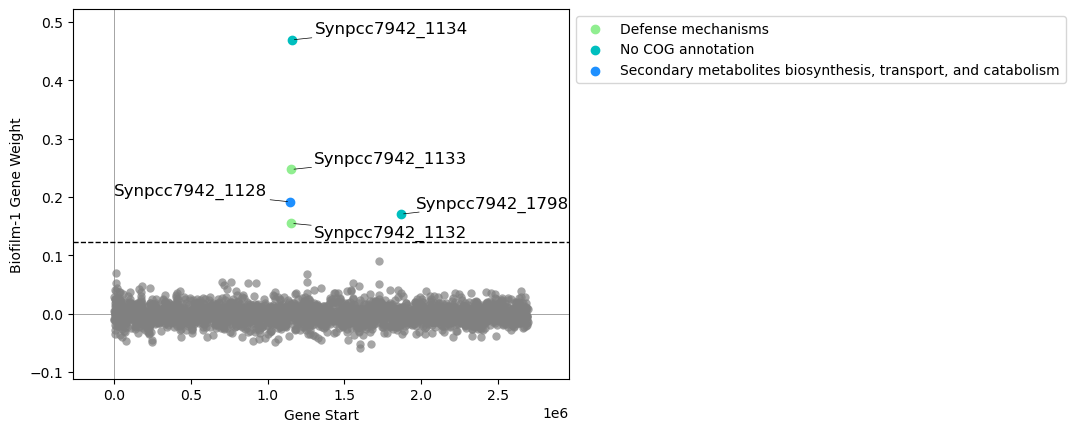

In [346]:
plot_gene_weights(ica_data,'Biofilm-1',show_labels=True)

<AxesSubplot:xlabel='Gene Start', ylabel='Biofilm-2 Gene Weight'>

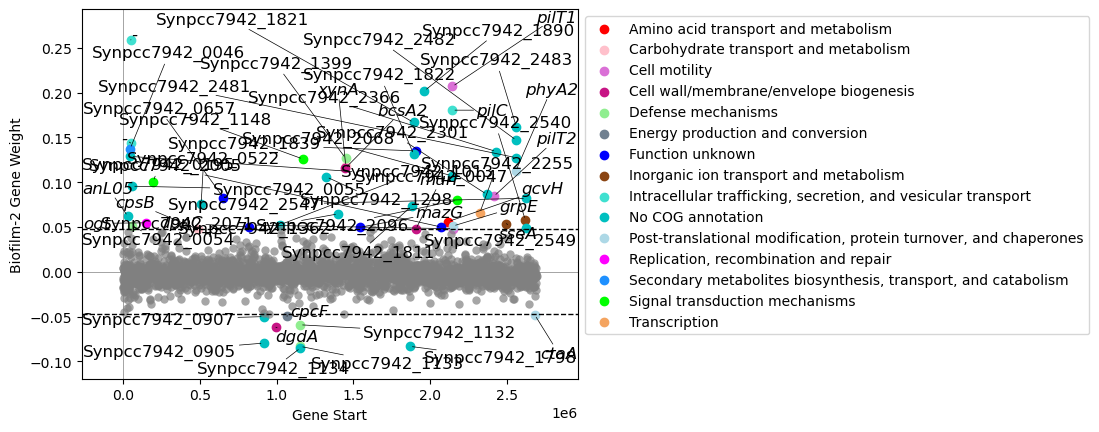

In [340]:
plot_gene_weights(ica_data,'Biofilm-2',show_labels=True)

<AxesSubplot:xlabel='Biofilm-1 Gene Weight', ylabel='Biofilm-2 Gene Weight'>

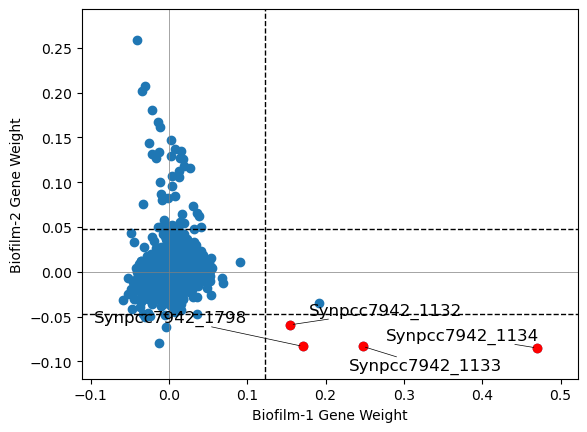

In [339]:
compare_gene_weights(ica_data,'Biofilm-1','Biofilm-2')

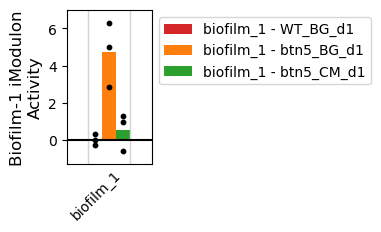

In [348]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_1'])
plt.savefig('../data/Figures/biofilm1_day1.pdf',transparent=True)

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

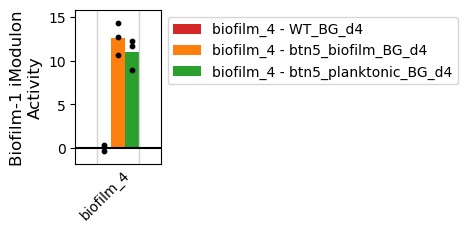

In [359]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_4'])

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

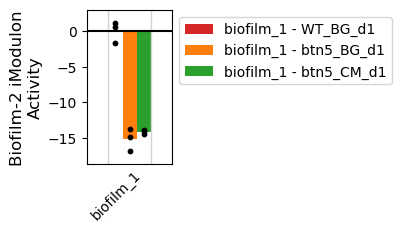

In [371]:
plot_activities(ica_data,'Biofilm-2',projects=['biofilm_1'])

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

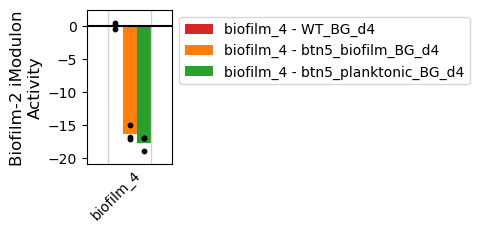

In [372]:
plot_activities(ica_data,'Biofilm-2',projects=['biofilm_4'])

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='phototaxis iModulon Activity'>

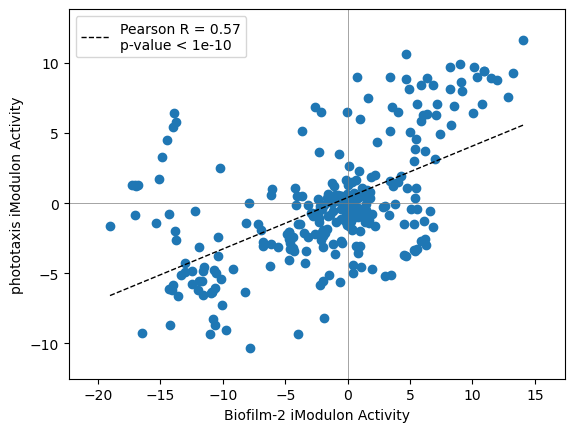

In [358]:
compare_activities(ica_data,'Biofilm-2','phototaxis')

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='competence iModulon Activity'>

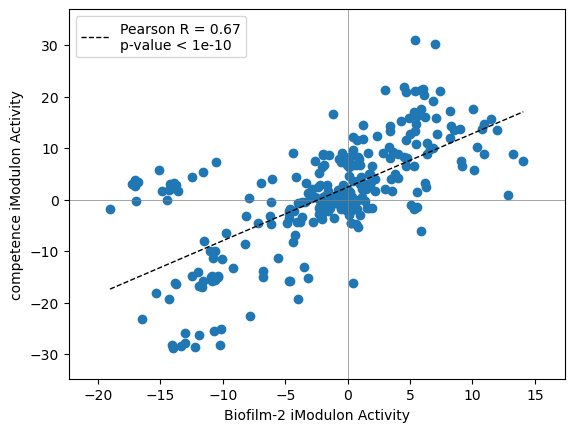

In [356]:
compare_activities(ica_data,'Biofilm-2','competence')

In [564]:
pd.read_csv('/home/annie/Documents/selon/data/processed_data/metadata.tsv',sep='\t',index_col=0)

Run          ReleaseDate             LoadDate  \
Experiment                                                                 
SRX10864008        SRR14518535  2022-03-07 02:10:01  2021-05-15 02:11:09   
SRX10864009        SRR14518534  2022-03-07 02:10:01  2021-05-15 02:11:33   
SRX10864010        SRR14518533  2022-03-07 02:10:01  2021-05-15 02:10:52   
SRX10864011        SRR14518532  2022-03-07 02:10:01  2021-05-15 02:11:21   
SRX10864012        SRR14518531  2022-03-07 02:10:01  2021-05-15 02:11:47   
...                        ...                  ...                  ...   
km_LL_1                    NaN                  NaN                  NaN   
post_uv_2hrs_1             NaN                  NaN                  NaN   
post_uv_control_1          NaN                  NaN                  NaN   
wt_LL_1                    NaN                  NaN                  NaN   
wt_LL_2                    NaN                  NaN                  NaN   

                        spots         bases  spots_with_mates  avgLength  \
Experiment                                                                 
SRX10864008        20663676.0  1.033184e+09               0.0       50.0   
SRX10864009        24072858.0  1.203643e+09               0.0       50.0   
SRX10864010        22938584.0  1.146929e+09               0.0       50.0   
SRX10864011        24106384.0  1.205319e+09               0.0       50.0   
SRX10864012        24090970.0  1.204548e+09               0.0       50.0   
...                       ...           ...               ...        ...   
km_LL_1                   NaN           NaN               NaN        NaN   
post_uv_2hrs_1            NaN           NaN               NaN        NaN   
post_uv_control_1         NaN           NaN               NaN        NaN   
wt_LL_1                   NaN           NaN               NaN        NaN   
wt_LL_2                   NaN           NaN               NaN        NaN   

                   size_MB  AssemblyName  \
Experiment                                 
SRX10864008          609.0           NaN   
SRX10864009          710.0           NaN   
SRX10864010          680.0           NaN   
SRX10864011          707.0           NaN   
SRX10864012          717.0           NaN   
...                    ...           ...   
km_LL_1                NaN           NaN   
post_uv_2hrs_1         NaN           NaN   
post_uv_control_1      NaN           NaN   
wt_LL_1                NaN           NaN   
wt_LL_2                NaN           NaN   

                                                       download_path  ...  \
Experiment                                                            ...   
SRX10864008        https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX10864009        https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX10864010        https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX10864011        https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
SRX10864012        https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...  ...   
...                                                              ...  ...   
km_LL_1                                                          NaN  ...   
post_uv_2hrs_1                                                   NaN  ...   
post_uv_control_1                                                NaN  ...   
wt_LL_1                                                          NaN  ...   
wt_LL_2                                                          NaN  ...   

                    OD                           fluorescent light intensity  \
Experiment                                                                     
SRX10864008        0.2  continuous illumination of 2000 to 3000 lx       NaN   
SRX10864009        0.2  continuous illumination of 2000 to 3000 lx       NaN   
SRX10864010        0.2  continuous illumination of 2000 to 3000 lx       NaN   
SRX10864011        0.2  continuous illumination of 2000 to 3000 lx       N

In [567]:
ica_data.sample_table = pd.read_csv('/home/annie/Documents/selon/data/processed_data/metadata.tsv',sep='\t',index_col=0)

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

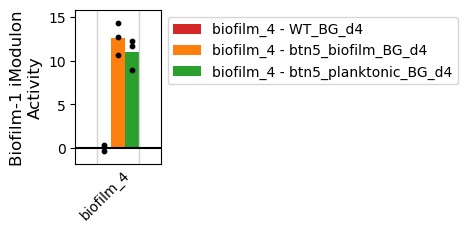

In [354]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_4'])

In [326]:
ica_data.sample_table[ica_data.sample_table.project=='biofilm_4'].BioProject[0]

'PRJNA845529'

<AxesSubplot:ylabel='ccm-2 iModulon\nActivity'>

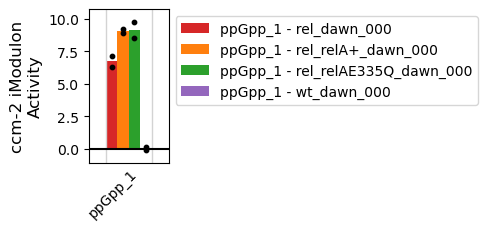

In [310]:
plot_activities(ica_data,'ccm-2',projects=['ppGpp_1'])

<AxesSubplot:ylabel='CysR iModulon\nActivity'>

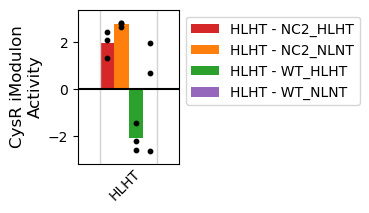

In [349]:
plot_activities(ica_data,'CysR','HLHT')